## Data Preprocessing and Cleaning

In [1]:
library(WDI)
library(ggplot2)
library(Boruta)
library(gganimate)
library(tidyverse)
library(visdat)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read CSV file
nz_df <- read.csv("./nz_data.csv")
head(nz_df)

,Country,Year,Unemployment_Rate,GDP,Foreign_Investment,GDP_Growth,CPI
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,New Zealand,1991,10.61,42744828653,NA,-1.090792,2.602393
2,New Zealand,1992,10.67,41649386970,NA,1.093834,1.014560
3,New Zealand,1993,9.80,46775038749,NA,6.391529,1.288208
4,New Zealand,1994,8.35,55313381443,NA,5.119248,1.745378
5,New Zealand,1995,6.46,63916899264,NA,4.722081,3.754944
6,New Zealand,1996,6.29,70140835299,NA,3.615674,2.285713


In [3]:
# Read CSV file
Exchange_Rate_df <- read.csv("./DataSet/nz_exchange_rate.csv")
head(Exchange_Rate_df)

,date,NZD.exchange.rate
,<chr>,<dbl>
1,1973-6-29,0.7535795
2,1973-7-30,0.7396450
3,1973-8-30,0.7440476
4,1973-9-29,0.6939625
5,1973-10-30,0.6752194
6,1973-11-29,0.6863418


In [4]:
Exchange_Rate_df <- Exchange_Rate_df %>%
  mutate(date = as.Date(date))

Exchange_Rate_df <- Exchange_Rate_df %>%
  mutate(year = lubridate::year(date))

average_exchange_rate_df <- Exchange_Rate_df %>%
  group_by(year) %>%
  summarize(Mean_Exchange_Rate = mean(NZD.exchange.rate, na.rm = TRUE))

head(average_exchange_rate_df)

year,Mean_Exchange_Rate
<dbl>,<dbl>
1973,0.7129475
1974,0.7153742
1975,0.8323563
1976,1.0046584
1977,1.0301359
1978,0.9638914


In [5]:
nz_data <- left_join(nz_df, average_exchange_rate_df, by = c("Year" = "year"))

head(nz_data)

,Country,Year,Unemployment_Rate,GDP,Foreign_Investment,GDP_Growth,CPI,Mean_Exchange_Rate
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,New Zealand,1991,10.61,42744828653,NA,-1.090792,2.602393,1.727675
2,New Zealand,1992,10.67,41649386970,NA,1.093834,1.014560,1.859296
3,New Zealand,1993,9.80,46775038749,NA,6.391529,1.288208,1.849940
4,New Zealand,1994,8.35,55313381443,NA,5.119248,1.745378,1.685681
5,New Zealand,1995,6.46,63916899264,NA,4.722081,3.754944,1.523514
6,New Zealand,1996,6.29,70140835299,NA,3.615674,2.285713,1.454756


In [6]:
library(rvest)

url <- "https://www.macrotrends.net/countries/NZL/new-zealand/exports"

webpage <- read_html(url)

# Select the parent element with class "col-xs-6"
parent_element <- html_node(webpage, ".col-xs-6")

# Select the table within the parent element
table <- html_node(parent_element, ".historical_data_table.table.table-striped.table-bordered")

# Extract the table as a data frame
Year <- html_table(table, fill = TRUE)[[1]]
Export_Billion <- html_table(table, fill = TRUE)[[2]]

Export <- data.frame(Year, Export_Billion)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [7]:
# Remove the first row, which may contain header information
Export <- Export[-1, ]

# Convert 'Year' and 'Billion' columns to numeric format
Export$Year <- as.numeric(Export$Year)
Export$Export_Billion <- as.numeric(gsub("\\$|B", "", Export$Export_Billion))

In [8]:
merged_data <- merge(nz_data, Export, by = "Year")
tail(merged_data)

,Year,Country,Unemployment_Rate,GDP,Foreign_Investment,GDP_Growth,CPI,Mean_Exchange_Rate,Export_Billion
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,2016,New Zealand,5.15,188838342528,-2772739977,3.8017580,0.6462403,1.436805,50.32
27,2017,New Zealand,4.74,206556258845,-2470087076,3.5244132,1.8507877,1.407110,56.99
28,2018,New Zealand,4.33,211886686924,-1872342297,3.5251832,1.5982970,1.444981,59.07
29,2019,New Zealand,4.11,213091987153,-4474410771,2.4459832,1.6196319,1.517566,58.22
30,2020,New Zealand,4.60,212569779570,-3413149095,-0.6539214,1.7145617,1.541536,46.21
31,2021,New Zealand,3.78,255551704626,-5609121605,5.1678474,3.9411206,1.413844,56.61


In [9]:
# Read CSV file
BCI_df <- read.csv("./BCI CCI/NZ BCI.csv")
head(BCI_df)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag.Codes
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
1,NZL,BCI,AMPLITUD,LTRENDIDX,M,1961-06,97.15784,NA
2,NZL,BCI,AMPLITUD,LTRENDIDX,M,1961-07,97.06767,NA
3,NZL,BCI,AMPLITUD,LTRENDIDX,M,1961-08,96.98736,NA
4,NZL,BCI,AMPLITUD,LTRENDIDX,M,1961-09,96.94371,NA
5,NZL,BCI,AMPLITUD,LTRENDIDX,M,1961-10,96.97765,NA
6,NZL,BCI,AMPLITUD,LTRENDIDX,M,1961-11,97.10481,NA


In [10]:
BCI <- BCI_df %>%
  mutate(Year = substr(TIME, 1, 4)) %>%  # get month
  group_by(Year) %>%
  summarize(mean_BCI = mean(Value))

head(BCI)

Year,mean_BCI
<chr>,<dbl>
1961,97.0880
1962,99.9178
1963,103.0963
1964,102.2307
1965,100.4097
1966,98.5674


In [11]:
# Read CSV file
CCI_df <- read.csv("./BCI CCI/NZ CCI.csv")
head(CCI_df)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag.Codes
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>
1,NZL,CCI,AMPLITUD,LTRENDIDX,M,1988-06,97.82806,NA
2,NZL,CCI,AMPLITUD,LTRENDIDX,M,1988-07,98.08096,NA
3,NZL,CCI,AMPLITUD,LTRENDIDX,M,1988-08,98.31213,NA
4,NZL,CCI,AMPLITUD,LTRENDIDX,M,1988-09,98.48027,NA
5,NZL,CCI,AMPLITUD,LTRENDIDX,M,1988-10,98.54838,NA
6,NZL,CCI,AMPLITUD,LTRENDIDX,M,1988-11,98.57066,NA


In [12]:
CCI <- CCI_df %>%
  mutate(Year = substr(TIME, 1, 4)) %>%  # get month
  group_by(Year) %>%
  summarize(mean_CCI = mean(Value))

head(CCI)

Year,mean_CCI
<chr>,<dbl>
1988,98.34753
1989,99.28496
1990,98.39113
1991,96.87869
1992,99.41322
1993,101.08517


In [13]:
Merged_CCI <- merge(merged_data, CCI, by = "Year")

tail(Merged_CCI)

,Year,Country,Unemployment_Rate,GDP,Foreign_Investment,GDP_Growth,CPI,Mean_Exchange_Rate,Export_Billion,mean_CCI
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,2016,New Zealand,5.15,188838342528,-2772739977,3.8017580,0.6462403,1.436805,50.32,99.93822
27,2017,New Zealand,4.74,206556258845,-2470087076,3.5244132,1.8507877,1.407110,56.99,100.28748
28,2018,New Zealand,4.33,211886686924,-1872342297,3.5251832,1.5982970,1.444981,59.07,99.80549
29,2019,New Zealand,4.11,213091987153,-4474410771,2.4459832,1.6196319,1.517566,58.22,99.45966
30,2020,New Zealand,4.60,212569779570,-3413149095,-0.6539214,1.7145617,1.541536,46.21,98.96570
31,2021,New Zealand,3.78,255551704626,-5609121605,5.1678474,3.9411206,1.413844,56.61,99.35504


In [14]:
# Merge Merged_CCI and BCI by the "Year" column
Merged_BCI <- merge(Merged_CCI, BCI, by = "Year")

# Remove the "Country" column from the merged data frame
Merged_BCI <- Merged_BCI[, !(colnames(Merged_BCI) %in% "Country")]

head(Merged_BCI)

,Year,Unemployment_Rate,GDP,Foreign_Investment,GDP_Growth,CPI,Mean_Exchange_Rate,Export_Billion,mean_CCI,mean_BCI
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1991,10.61,42744828653,NA,-1.090792,2.602393,1.727675,12.46,96.87869,99.18528
2,1992,10.67,41649386970,NA,1.093834,1.014560,1.859296,12.99,99.41322,103.02523
3,1993,9.80,46775038749,NA,6.391529,1.288208,1.849940,14.31,101.08517,103.56240
4,1994,8.35,55313381443,NA,5.119248,1.745378,1.685681,17.02,102.11631,103.18218
5,1995,6.46,63916899264,NA,4.722081,3.754944,1.523514,18.79,101.72528,100.27095
6,1996,6.29,70140835299,NA,3.615674,2.285713,1.454756,19.88,101.40378,99.83620


## Data Visualization and Analysis

We can observe trends in some variables.

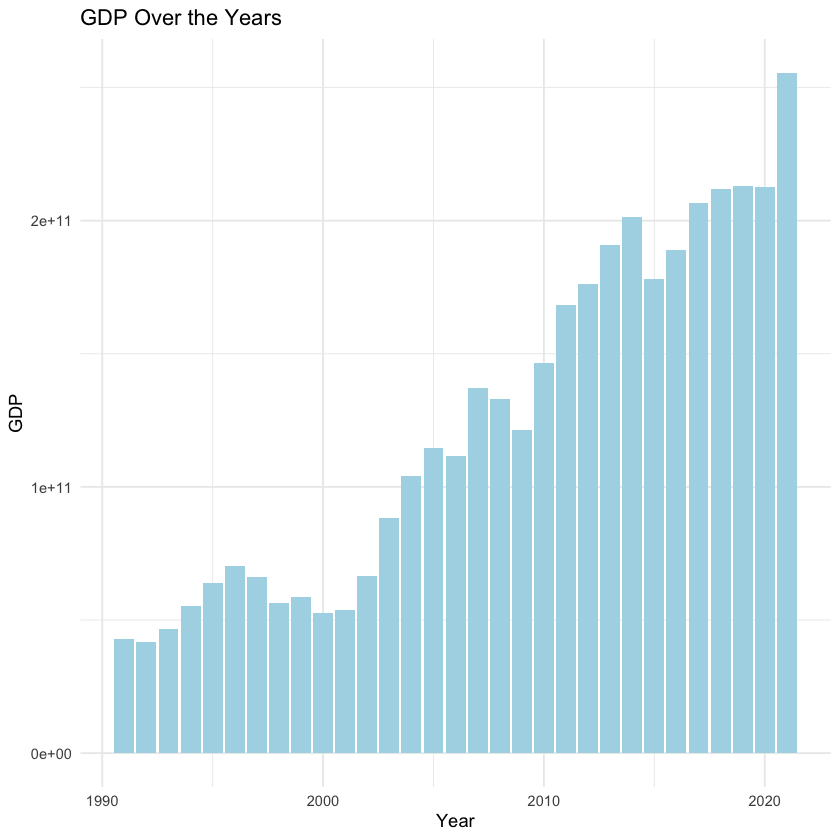

In [15]:
ggplot(Merged_BCI, aes(x = Year, y = GDP)) +
  geom_bar(fill = "lightblue", stat = "identity") +
  labs(title = "GDP Over the Years", x = "Year", y = "GDP") +
  theme_minimal()

GDP shows an overall upward trend over the years, with slight declines in 2000, 2008, and 2015.

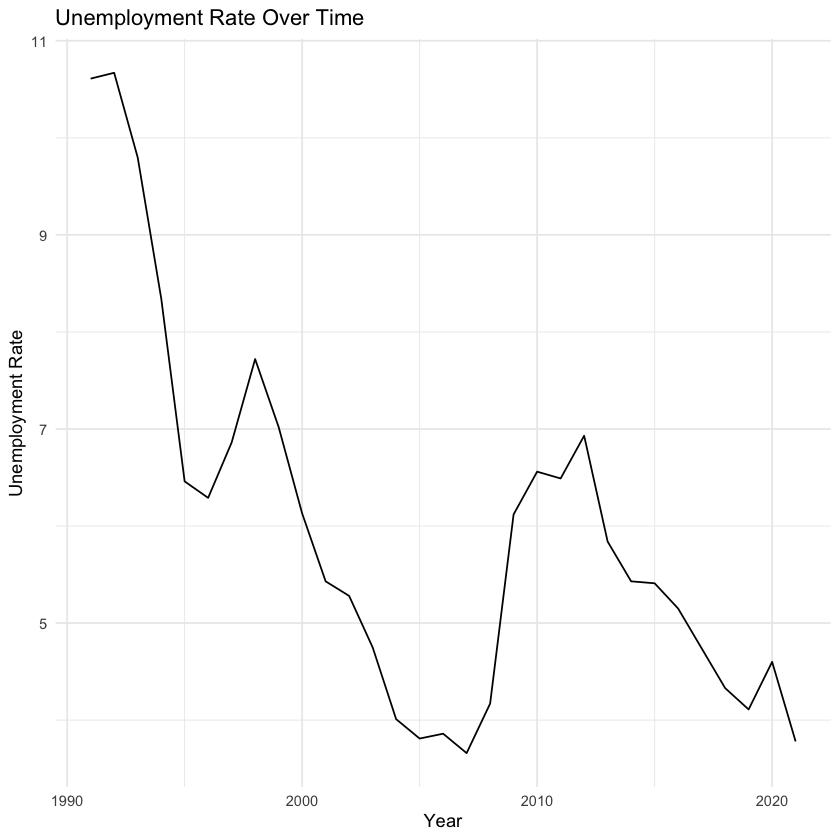

In [16]:
ggplot(data = Merged_BCI, aes(x = Year, y = Unemployment_Rate)) +
  geom_line() +
  labs(title = "Unemployment Rate Over Time", x = "Year", y = "Unemployment Rate") +
  theme_minimal()

During years when GDP decreases, there is also a noticeable upward trend in the unemployment rate.

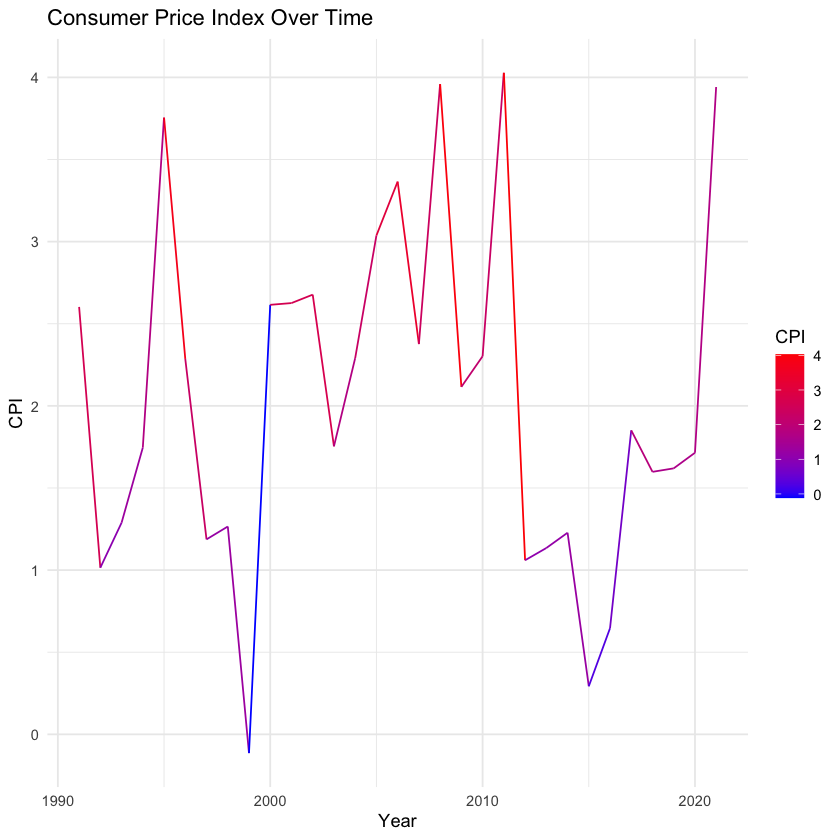

In [17]:
# Create a line plot of CPI over the Year
ggplot(Merged_BCI, aes(x = Year, y = CPI, color = CPI)) +
  geom_line() +
  labs(title = "Consumer Price Index Over Time",
       x = "Year",
       y = "CPI") +
  theme_minimal() +
  scale_color_gradient(low = "blue", high = "red")


Ideally, the CPI should remain between 1% and 3%, a range that was consistently achieved most of the time.

To build our model, we visualize certain correlations.

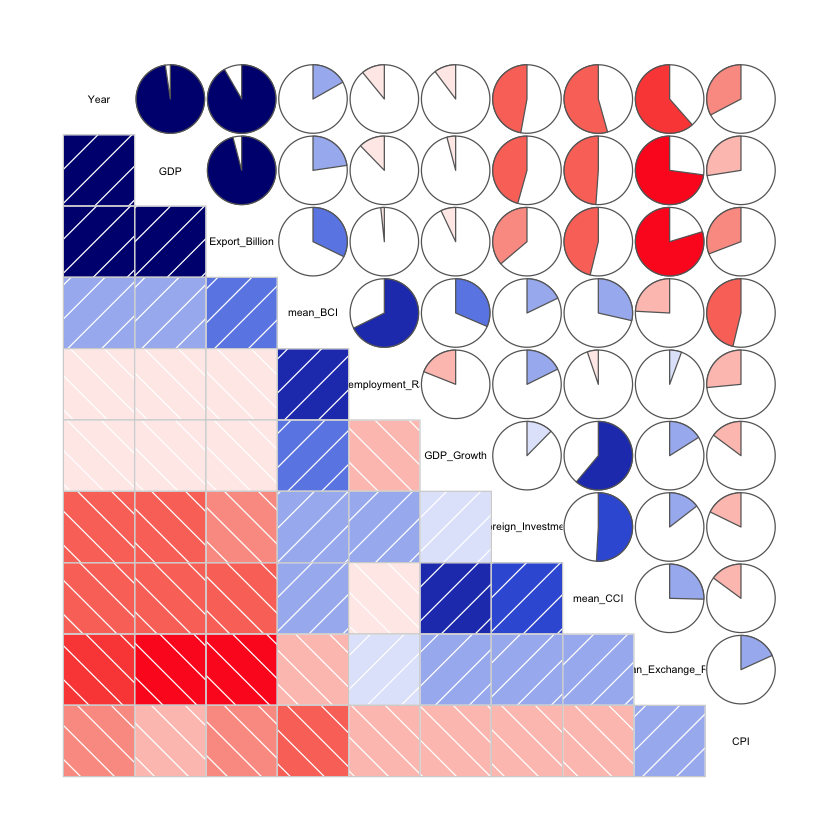

In [18]:
library(corrgram)
# Calculate the correlation matrix
cor_matrix <- cor(Merged_BCI, use = "complete.obs")

# Create a correlation plot
corrgram(
  cor_matrix,
  order = TRUE,
  lower.panel = panel.shade,
  upper.panel = panel.pie,
  text.panel = panel.txt
)

One key observation is the dark blue area in the top-left corner, indicating a strong correlation between year, exports, and GDP.

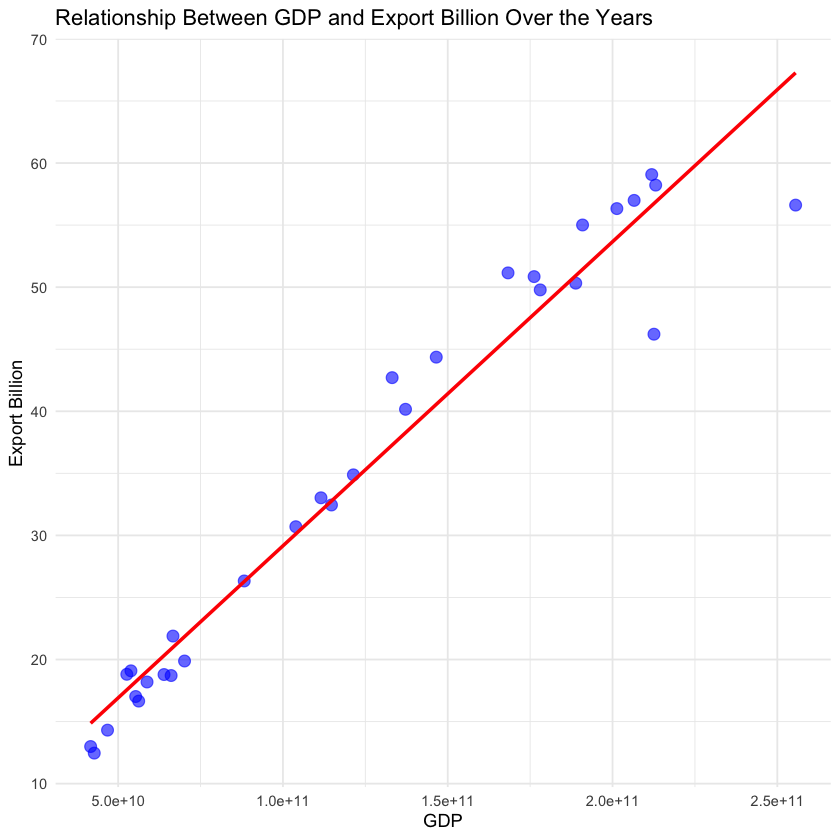

In [19]:
# Create a scatterplot with a line of fit
ggplot(data = Merged_BCI, aes(x = GDP, y = Export_Billion)) +
  geom_point(size = 3, color = "blue", alpha = 0.6) +  
  geom_smooth(formula = 'y ~ x', method = "lm", color = "red", se = FALSE) +  
  labs(title = "Relationship Between GDP and Export Billion Over the Years", x = "GDP", y = "Export Billion") +
  theme_minimal()


We can observe a strong positive correlation between GDP and export amount, meaning that as GDP increases, the export amount also rises.

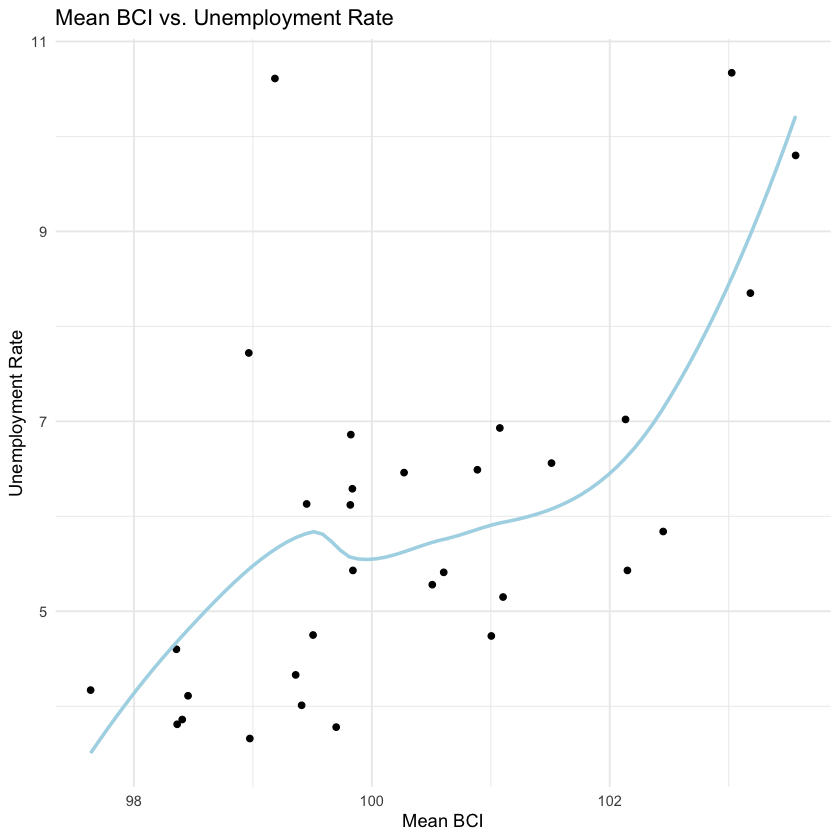

In [20]:
ggplot(data = Merged_BCI, aes(x = mean_BCI, y = Unemployment_Rate)) +
  geom_point() +
  geom_smooth(formula = 'y ~ x', method = "loess", se = FALSE, color = "lightblue") + 
  labs(title = "Mean BCI vs. Unemployment Rate", x = "Mean BCI", y = "Unemployment Rate") +
  theme_minimal()

The unemployment rate increases as the value of BCI rises.

This makes us ponder about the detailed correlation between the unemployment rate and other variables.

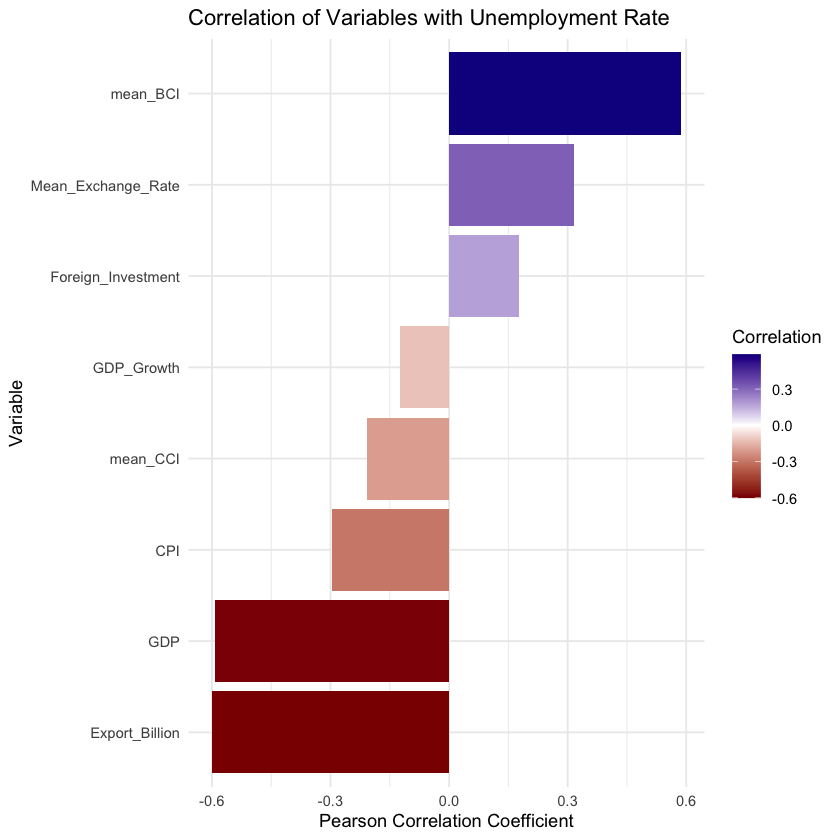

In [21]:
# Calculate the correlation between Unemployment_Rate and other variables
correlations <- sapply(Merged_BCI[, -1], function(col) cor(Merged_BCI$Unemployment_Rate, col, use = "complete.obs"))

# Convert to data frame
correlation_df <- data.frame(Variable = names(correlations), Correlation = correlations)

# Remove the row where Variable is 'Unemployment_Rate'
correlation_df <- correlation_df %>%
  filter(Variable != "Unemployment_Rate")

# Sort data based on the correlation
correlation_df <- correlation_df %>%
  arrange(desc(Correlation))

correlation_df$Variable <- factor(correlation_df$Variable, levels = rev(correlation_df$Variable))

ggplot(correlation_df, aes(x = Variable, y = Correlation, fill = Correlation)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_fill_gradient2(low = "darkred", mid = "white", high = "darkblue", midpoint = 0, name = "Correlation") +
  labs(title = "Correlation of Variables with Unemployment Rate",
       y = "Pearson Correlation Coefficient",
       x = "Variable") +
  theme_minimal()


We can clearly discern the relationships between the unemployment rate and various economic indicators.

Positive Correlation: The unemployment rate is positively correlated with BCI, Exchange Rate, Foreign_Investment. Among these, the correlation with mean_BCI is the most pronounced, followed by Exchange Rate, and then Foreign_Investment.

Negative Correlation: On the other hand, the unemployment rate is negatively correlated with GDP, CPI, Export_Billion, CCI, and GDP_Growth. Among these indicators, the negative correlation with Export is the most significant, followed in order by GDP, CCI, CPI, and GDP_Growth.

In [22]:
write.csv(Merged_BCI, "tidy_data.csv", row.names = FALSE)